# Project 7 - Predictive ML


Notebook: asbourgeois_ml.ipynb


Author: Alexia Bourgeois


GitHub Repository: https://github.com/asbourgeois/datafun-07-ml

In [530]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

Practicing Charting a straight line from example in textbook.

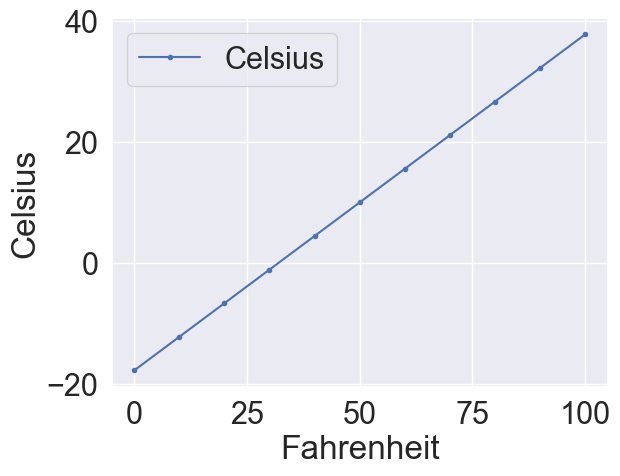

In [531]:
# Convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Create a list of Fahrenheit temperatures and their corresponding Celsius values
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create a DataFrame from the list of temperatures and plot the data
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot the data
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


# Part 2 - Prediction
Used 10.16 in the textbook to create a line of regression model and predict the future high tempurature in NYC based on past data.

### Section 1 - Data Acquisition


In [532]:
#Loading the dataset into a DataFrame using pandas.
nyc_df = pd.read_csv('../data/raw/ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [533]:
#Head of the DataFrame (first five rows and first table)
display(nyc_df.head())

#Tail of the DataFrame (last five rows and second table)
display(nyc_df.tail())

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [534]:
#Renaming the columns of the DataFrame to be more descriptive and easier to work with.
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

#Getting the first three rows of the DataFrame to check the new column names and make sure they are correct.
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [535]:
#Checking the data type for Date
nyc_df.Date.dtype

dtype('int64')

In [536]:
#Transforming the Date column to be in a more usable format by dividing the values by 100 and taking the floor of the result to get the year.
nyc_df['Date'] = nyc_df['Date'].floordiv(100)

#Checking the first three rows of the DataFrame again to make sure the Date column has been transformed correctly.
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [537]:
#Setting the display precision for floating-point numbers to 2 decimal places.
pd.set_option('display.precision', 2)

#Getting the descriptive statistics for the Temperature column.
nyc_df.Temperature.describe()


count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the model

In [538]:
from scipy import stats

#Perform linear regression on the Date and Temperature columns of the DataFrame to get the slope and intercept of the best fit line.
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

#Slope of the linear regression line
linear_regression.slope
print('Linear regression slope:', linear_regression.slope)

#Intercept of the linear regression line
linear_regression.intercept
print('Linear regression intercept:', linear_regression.intercept)

Linear regression slope: 0.014771361132966163
Linear regression intercept: 8.694993233674289


### Section 6 - Predict

In [539]:
#Using the slope and intercept from the linear regression to predict the average high temperature in New York City for the year 2024.

print('Predicted average high temp in NYC for January 2024:')
float(linear_regression.slope * 2024 + linear_regression.intercept)

Predicted average high temp in NYC for January 2024:


38.5922281667978

### Section 7 - Visualization

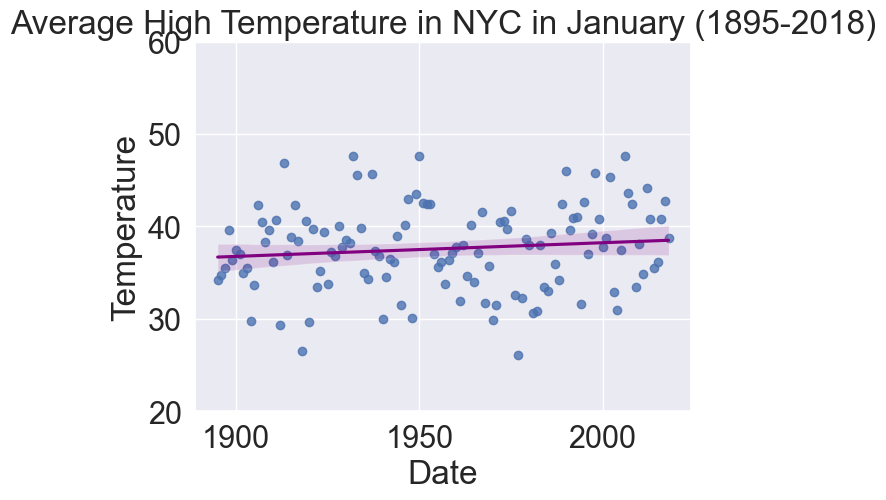

In [540]:
#Importing the seaborn library and the matplotlib library for data visualization, and the MultipleLocator class from the matplotlib.ticker module for setting the tick marks on the axes.
import seaborn as sns


#Setting the style of the plot to 'darkgrid' which adds a dark background with gridlines to the plot.
sns.set_style('darkgrid')

#Creating a regression plot with Date on the x-axis and Temperature on the y-axis.
axes = sns.regplot(x='Date', y='Temperature', data=nyc_df, line_kws={'color': 'purple'})

#Setting the limits of the x-axis to be from 1900 to 2025 to focus on the data from the 20th and 21st centuries.
axes.set_ylim(20, 60)



#Setting the title of the plot to 'Average High Temperature in NYC in January (1895-2018)' to provide context for the data being visualized.
title = axes.set_title('Average High Temperature in NYC in January (1895-2018)')

# Part 3 - Prediction

### Section 1 - Build the Model

In [541]:
#Import the test_train_split function.
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing sets, with 75% of the data used for training and 25% for testing. The random_state parameter is set to 11 to ensure that the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(
  nyc_df.Date.values.reshape(-1, 1), 
  nyc_df.Temperature.values, 
  random_state=11)


In [542]:
#Confirming the shapes of the training and testing sets to make sure they are correct and that the split was successful.

#Confirming the shape of the training set, which should have 93 rows and 1 column (the Date column).
print('The shape of X_train is:', X_train.shape)

#Confirming the shape of the testing set, which should have 31 rows and 1 column (the Date column).
print('The shape of X_test is:', X_test.shape)

The shape of X_train is: (93, 1)
The shape of X_test is: (31, 1)


In [543]:
#Training a linear regression model using the training data.
from sklearn.linear_model import LinearRegression

#Create an empty linear regression model and then fit the model to the training data.
linear_regression = LinearRegression()

#Fitting the linear regression model to the training data, with X_train as the input features (the Date column) and y_train as the target variable (the Temperature column).
linear_regression.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [544]:
#Displaying the slope of the linear regression line.
print('The slope of the linear regression line is:', linear_regression.coef_[0])

#Displaying the intercept of the linear regression line (in floatpoint).
print('The intercept of the linear regression line is:', float(linear_regression.intercept_))

The slope of the linear regression line is: 0.019391673294782773
The intercept of the linear regression line is: -0.30779820252656975


### Section 2 - Test the Model

In [545]:
#Using the predict method of the linear regression model to make predictions on the testing data.
predicted = linear_regression.predict(X_test)


#Print predicted and expected values for comparison.
expected = y_test


#Looping through paired predictions and actual values with formatted output to show the predicted and expected values side by side for easier comparison.
for p, e in zip(predicted, expected):
  print(f'Predicted: {p:.2f}, Expected: {e:.2f}')


Predicted: 37.86, Expected: 31.70
Predicted: 36.48, Expected: 35.50
Predicted: 37.93, Expected: 40.50
Predicted: 36.61, Expected: 29.80
Predicted: 36.75, Expected: 40.70
Predicted: 38.69, Expected: 34.80
Predicted: 36.44, Expected: 34.20
Predicted: 37.14, Expected: 38.20
Predicted: 37.62, Expected: 36.20
Predicted: 37.53, Expected: 42.50
Predicted: 37.00, Expected: 39.40
Predicted: 38.32, Expected: 40.90
Predicted: 37.20, Expected: 39.80
Predicted: 38.46, Expected: 40.80
Predicted: 36.56, Expected: 37.00
Predicted: 37.25, Expected: 45.70
Predicted: 38.18, Expected: 33.00
Predicted: 37.89, Expected: 29.90
Predicted: 38.15, Expected: 38.00
Predicted: 38.63, Expected: 42.40
Predicted: 38.05, Expected: 32.30
Predicted: 37.02, Expected: 33.80
Predicted: 37.12, Expected: 38.50
Predicted: 37.70, Expected: 37.80
Predicted: 36.73, Expected: 36.10
Predicted: 37.64, Expected: 33.80
Predicted: 37.56, Expected: 42.40
Predicted: 38.11, Expected: 30.60
Predicted: 36.87, Expected: 38.40
Predicted: 36.

### Section 3 - Predict

In [546]:
#Define a prediction function using the model's learned slope and intercept.
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

#Predict the temperature for 2024.
predict(2024)

#Print the predicted average high temperature in NYC for January 2024 using the predict function and formatting the output to show only two decimal places.
print('Predicted average high temp in NYC for January 2024:', predict(2024).item())


Predicted average high temp in NYC for January 2024: 38.94094854611376


### Section 3 - Visualizations

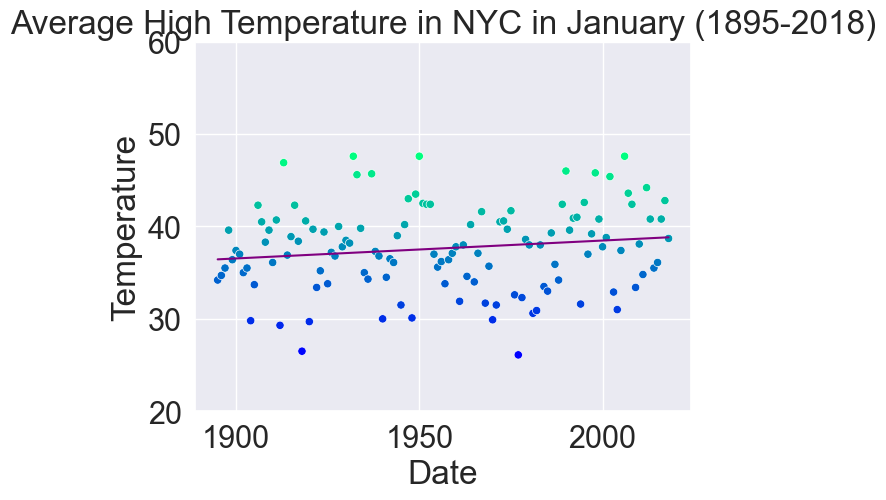

In [547]:
#Importinng the necessary libraries for data visualization.
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Creating a scatter plot of the Date and Temperature columns of the DataFrame.
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', 
hue='Temperature', palette='winter', legend=False)

#Setting the title of the plot to 'Average High Temperature in NYC in January (1895-2018)' to provide context for the data being visualized.
axes.set_title('Average High Temperature in NYC in January (1895-2018)')

#Setting the limits of the y-axis to be from 20 to 60.
axes.set_ylim(20, 60)

#Using the predict function to create a line of best fit based on the linear regression model and plotting it on top of the scatter plot.
x = np.array([min(nyc_df.Date), max(nyc_df.Date)])

#Using the predict function to get the predicted temperature values for the minimum and maximum dates.
y = predict(x)

#Plotting the line of best fit on top of the scatter plot with a purple color to differentiate it from the data points and make it easier to see the trend in the data.
line = plt.plot(x, y, color='purple')

## Part 4 - My Insights

SciPy and scikit-learn both let you run linear regression, but they are different when using it because they are made for different purposes. The first one (SciPy) is extremly simple, it gives you the slope and intercept right away. This makes it useful for small projects or just checking to make sure some statistics are correct. The second one (scikit-learn) is more structured and requires a bit more work on the user's end. It expects you to split your data into two different sets (training and testing)  which makes it feel more like a normal modeling process rather than a quick answer tool. Scikit-learn also uses coef_ and intercept_ instead of slope and intercept. As I was working through the projects, I also saw that with scikit-learn, you are able to complete some depper statistics. Overall, SciPy is good for quick calculations while scikit-learn is better for a larger data set that needs to be more organized.

## Part 5 - Bonus

In [548]:
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

### Section 1 - Loading the Data

In [549]:
#Importing the fetch_california_housing function from the sklearn.datasets module to load the California housing dataset.
from sklearn.datasets import fetch_california_housing

#Loading the California housing dataset into a variable called california.
california = fetch_california_housing()

### Section 2 - Displaying the Dataset's Description

In [550]:
#Printing the description of the California housing dataset to understand the features and target variable in the dataset.
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [551]:
#Printing the shape of the data in the California housing dataset.
print('The shape of the California housing data is:', california.data.shape)

#Printing the shape of the target variable in the California housing dataset.
print('The shape of the California housing target is:', california.target.shape)

#Printing the feature names of the California housing dataset.
print('The feature names of the California housing dataset are:', california.feature_names)

The shape of the California housing data is: (20640, 8)
The shape of the California housing target is: (20640,)
The feature names of the California housing dataset are: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Section 3 - Cleaning the Data

In [552]:
import pandas as pd

#Set the display precision for floating-point numbers to 4 decimal places.
pd.set_option('display.precision', 4)

#Setting the maximum number of columns to display in the output to 9.
pd.set_option('display.max_columns', 9)

#Setting the display width to None to allow for unlimited width when displaying DataFrames.
pd.set_option('display.width', None)

#Creating a DataFrame from the California housing dataset using the data and feature names.
california_df = pd.DataFrame(california.data, columns=california.feature_names)

#Adding a new column to the DataFrame called 'MedHouseVal' which represents the median house value for each row of data.
california_df['MedHouseVal'] = pd.Series(california.target)

#Displaying the first five rows of the California housing DataFrame to check that it has been created correctly and to get an overview of the data.
display(california_df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


### Section 4 - Descriptive Statistics

In [553]:
#Getting the descriptive statistics for the California housing DataFrame to understand the distribution of the data and identify any potential outliers or patterns in the dataset.
display(california_df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Section 5 - Visualization

In [554]:
#Creating a sample of the California housing DataFrame by randomly selecting 10% of the rows, with a random state of 17 to ensure reproducibility.
sample_df = california_df.sample(frac=0.1, random_state=17)

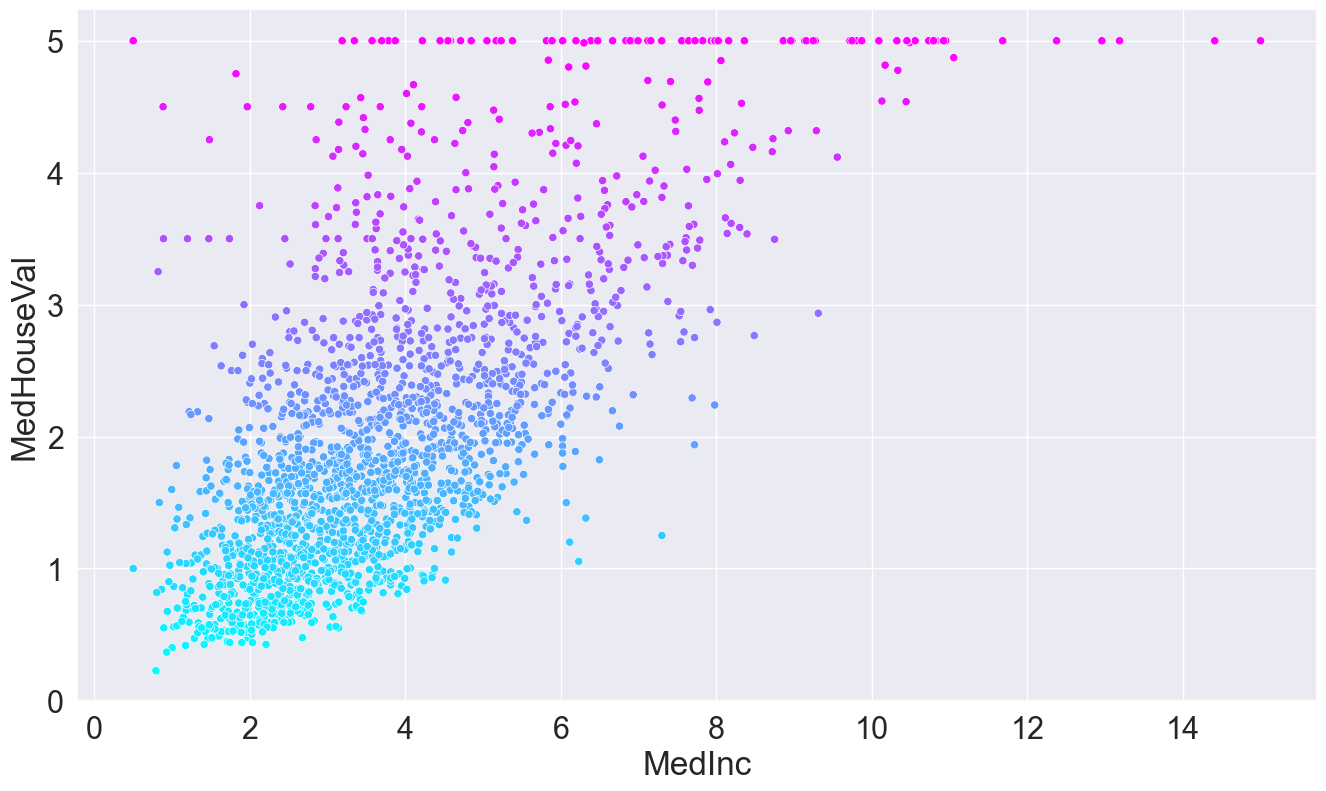

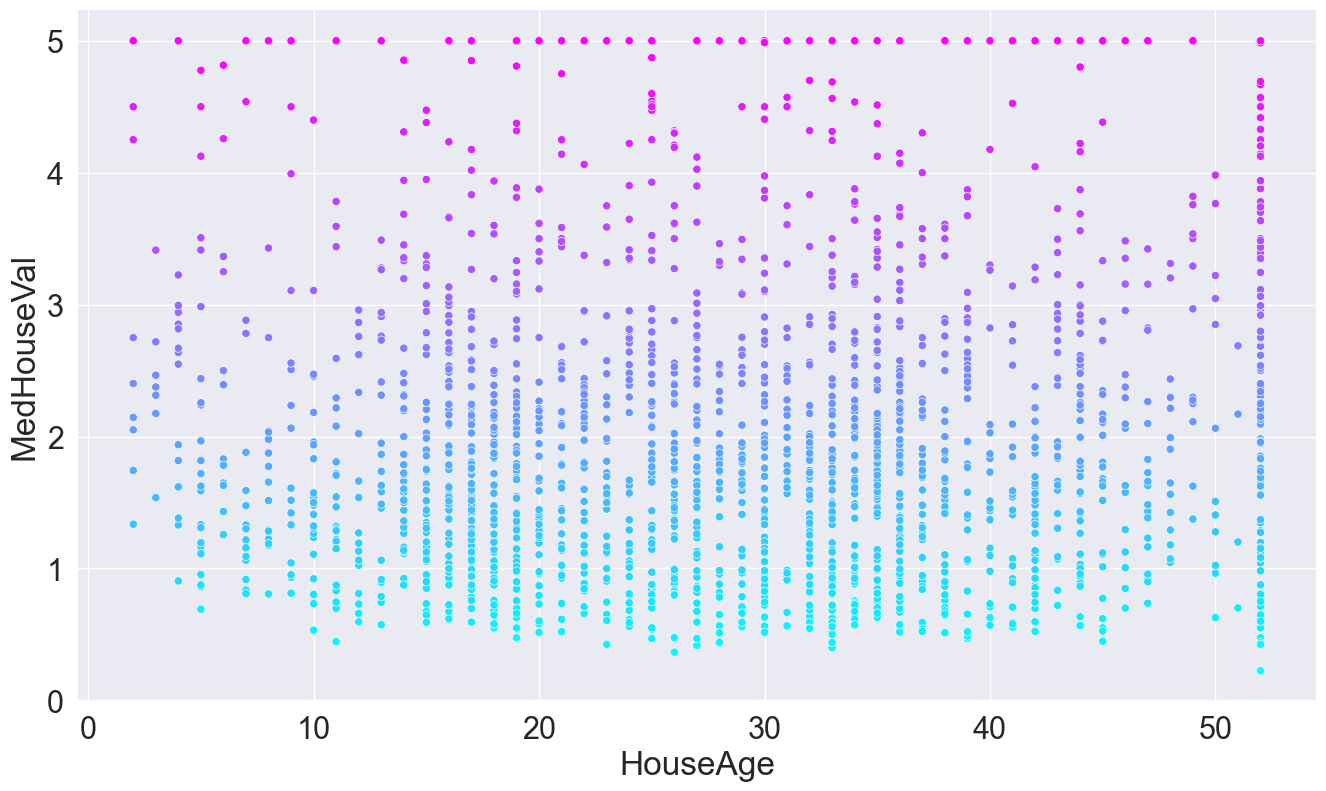

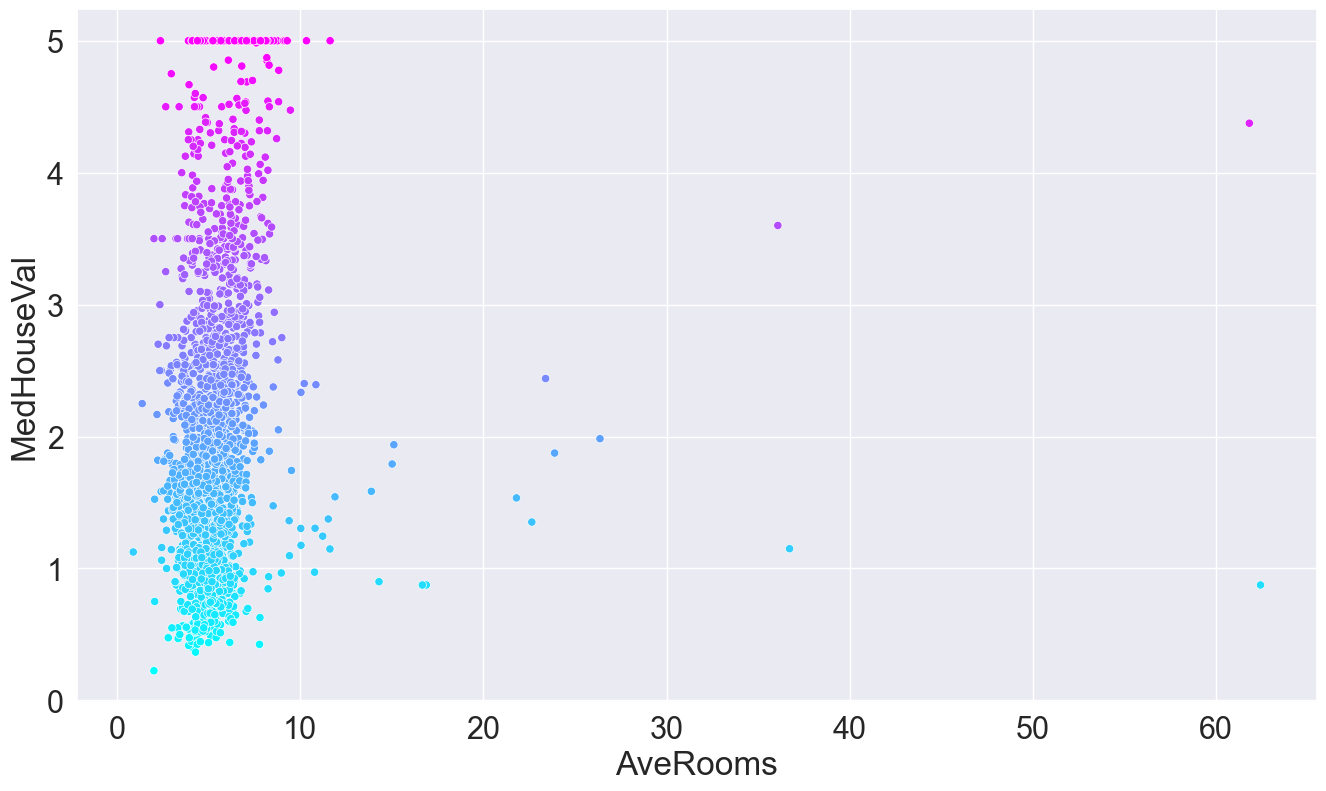

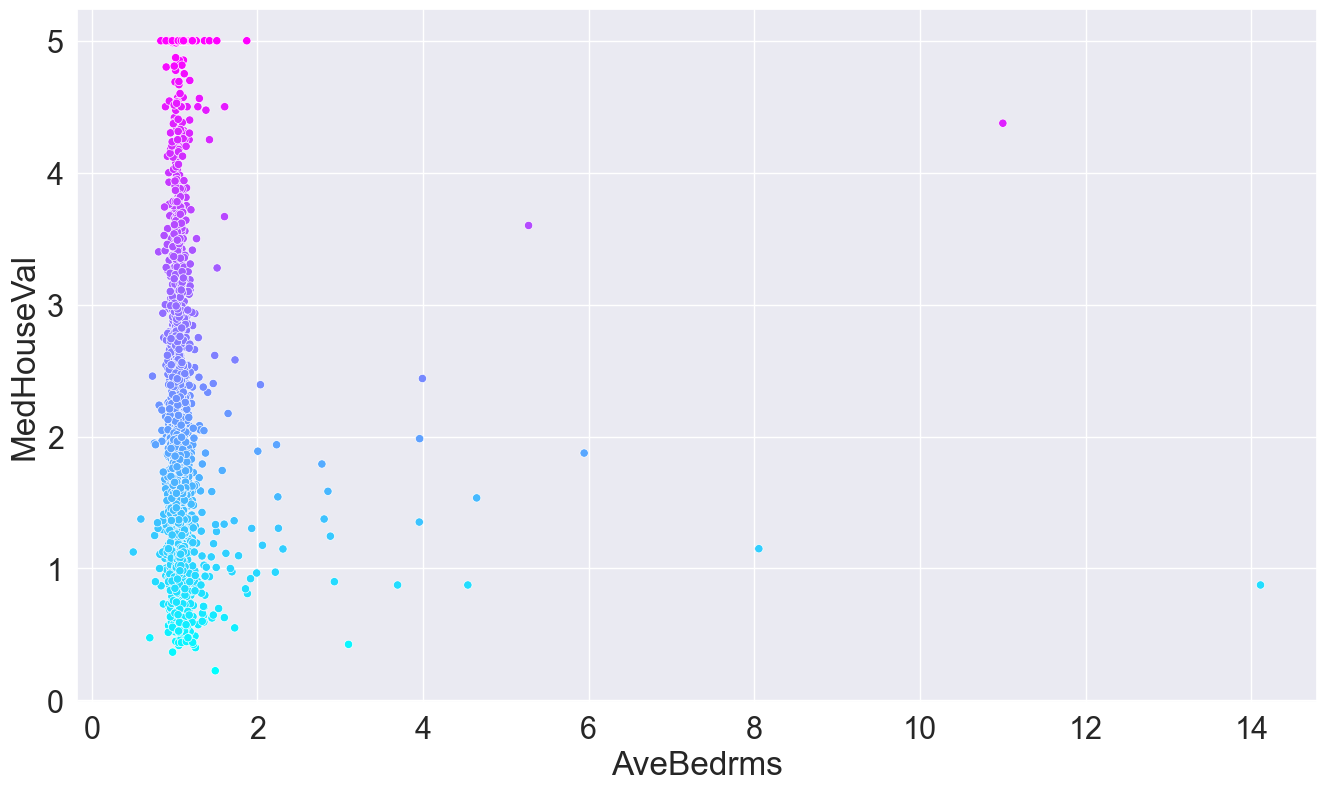

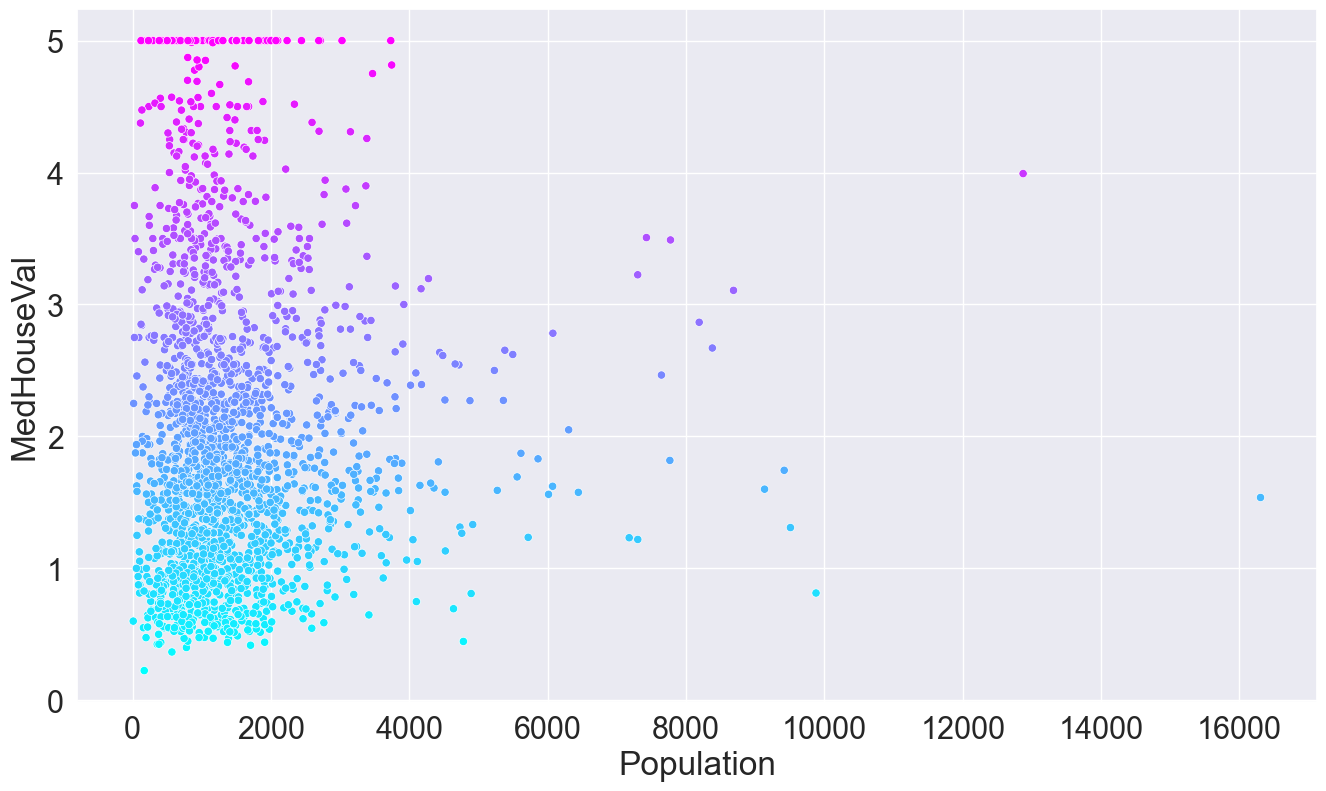

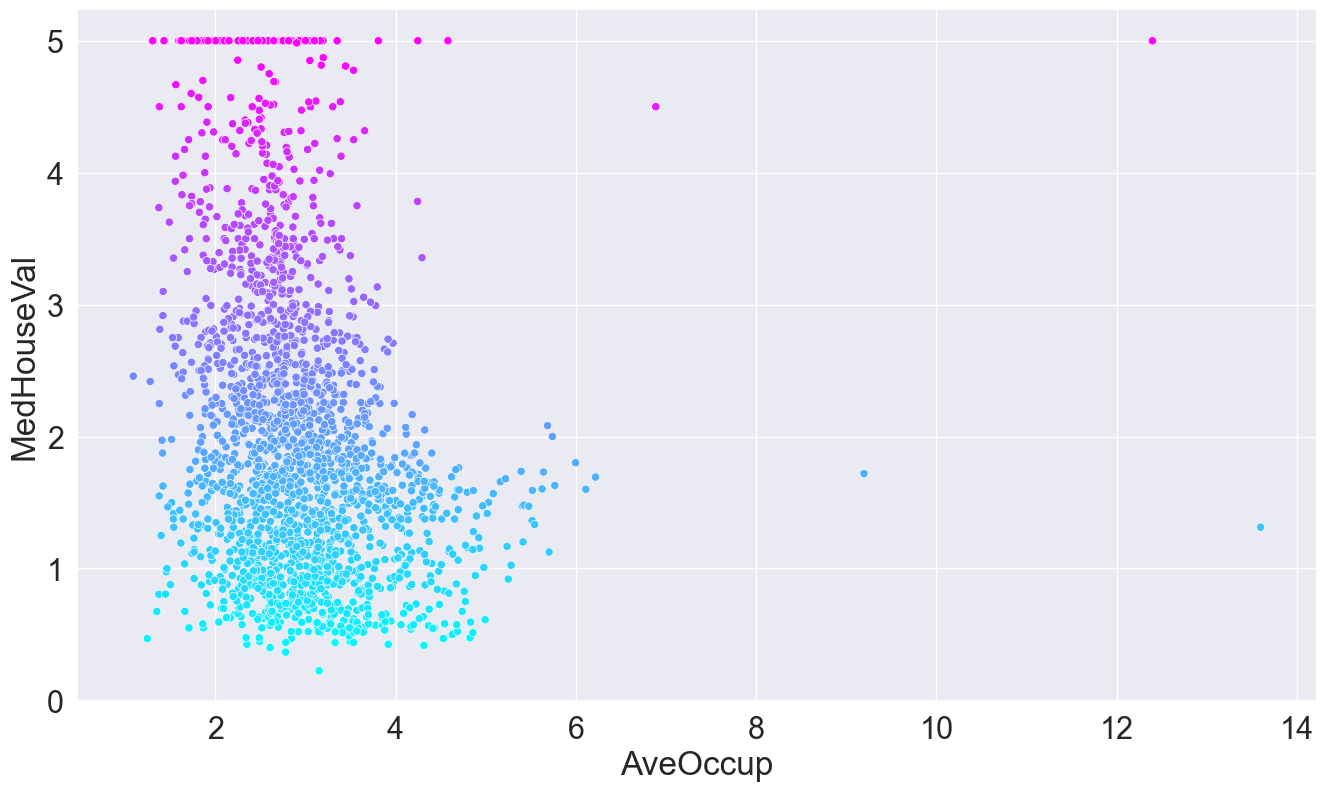

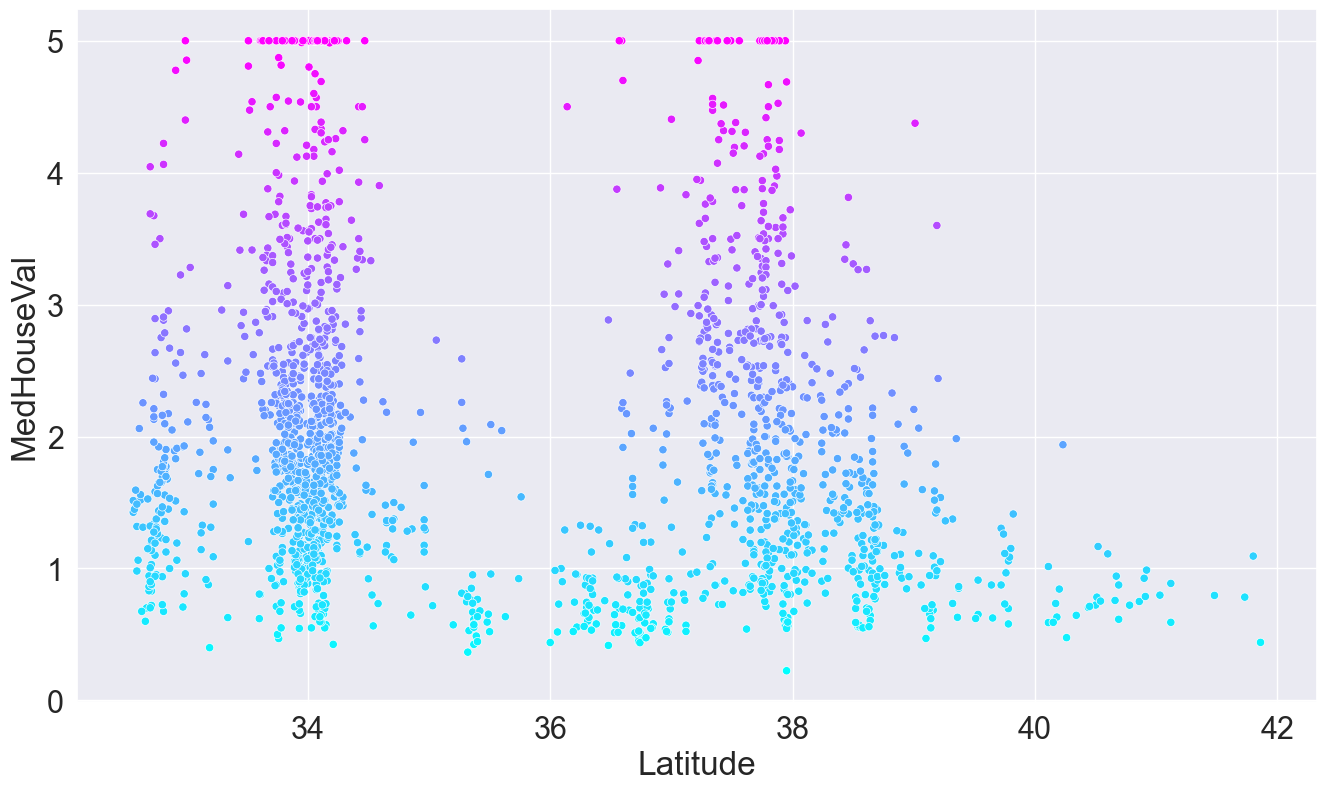

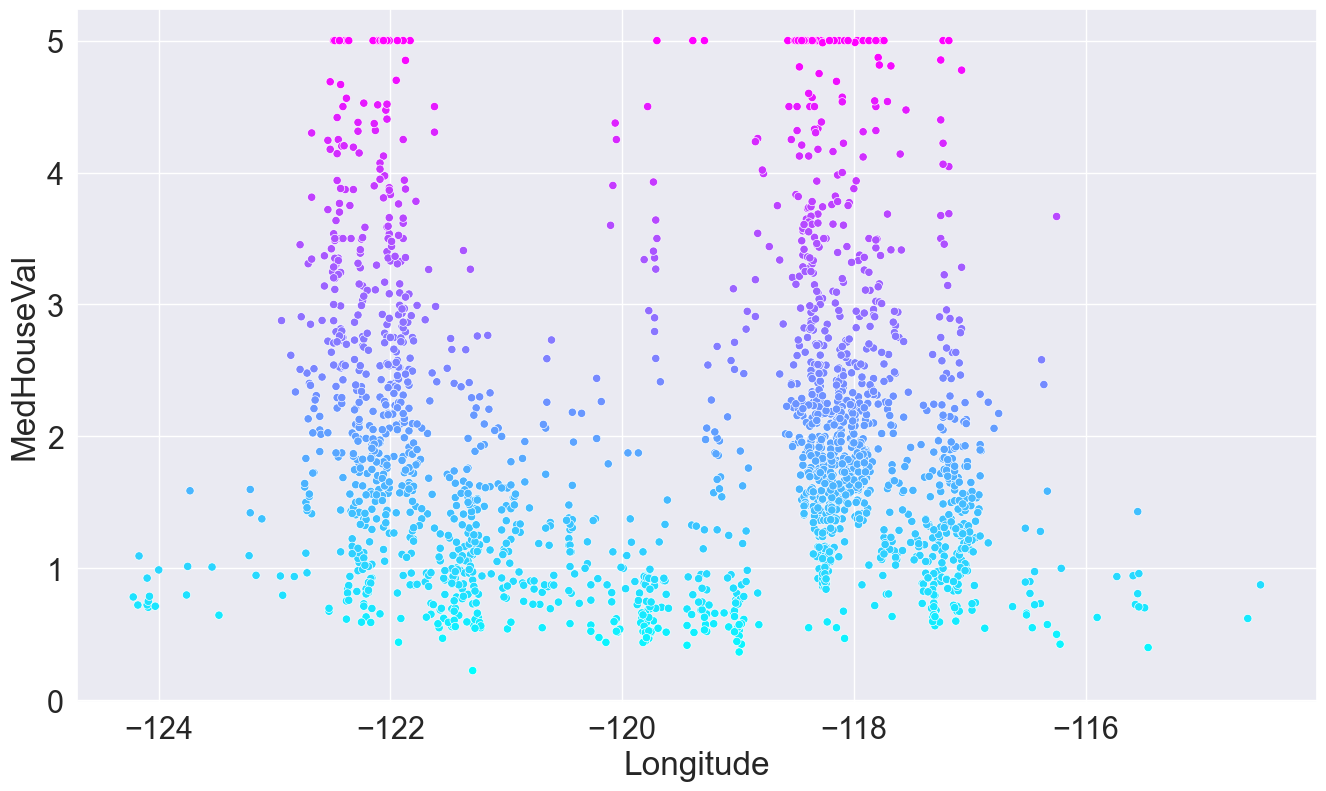

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the font scale for the seaborn plots to 2.
sns.set(font_scale=2)

#Setting the style of the seaborn plots to 'darkgrid'.
sns.set_style('darkgrid')

#Looping through each feature in the California housing dataset and creating a scatter plot of the feature against the median house value.
for feature in california.feature_names:
  plt.figure(figsize=(16, 9))
  sns.scatterplot(data=sample_df, x=feature, y='MedHouseVal', hue='MedHouseVal', palette='cool', legend=False)

### Section 6 - Build the Model

In [556]:
from sklearn.model_selection import train_test_split

#Splitting the data into training and testing sets, with 75% of the data used for training and 25% for testing. The random_state parameter is set to 11 to ensure that the split is reproducible.
X_train, X_test, y_train, y_test = train_test_split(
  california.data, 
  california.target, 
  random_state=11)

#Confirming the shapes of the training and testing sets to make sure they are correct and that the split was successful.
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (15480, 8)
X_test.shape: (5160, 8)


In [557]:
from sklearn.linear_model import LinearRegression

#Create an empty linear regression model and then fit the model to the training data.
linear_regression = LinearRegression()

#Fitting the linear regression model to the training data, with X_train as the input features and y_train as the target variable.
linear_regression.fit(X=X_train, y=y_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [558]:
#Looping through each feature in the California housing dataset and printing the feature name along with its corresponding coefficient from the linear regression model.
for i, name in enumerate(california.feature_names):
  print(f'{name:>10}: {linear_regression.coef_[i]:.4f}')

#Displaying the intercept of the linear regression model.
print('Intercept:', float(linear_regression.intercept_))

    MedInc: 0.4377
  HouseAge: 0.0092
  AveRooms: -0.1073
 AveBedrms: 0.6117
Population: -0.0000
  AveOccup: -0.0034
  Latitude: -0.4195
 Longitude: -0.4338
Intercept: -36.8829506560555


### Section 7 - Test the Model

In [559]:
#Using the predict method of the linear regression model to make predictions on the testing data.
predicted = linear_regression.predict(X_test)

#Print predicted and expected values for comparison.
expected = y_test

#Looping through paired predictions and actual values with formatted output to show the predicted and expected values side by side for easier comparison.
print("Predicted values:", predicted[:5])
print("Expected values: ", expected[:5])


Predicted values: [1.25396876 2.34693107 2.03794745 1.8701254  2.53608339]
Expected values:  [0.762 1.732 1.125 1.37  1.856]


### Section 8 - Visualization

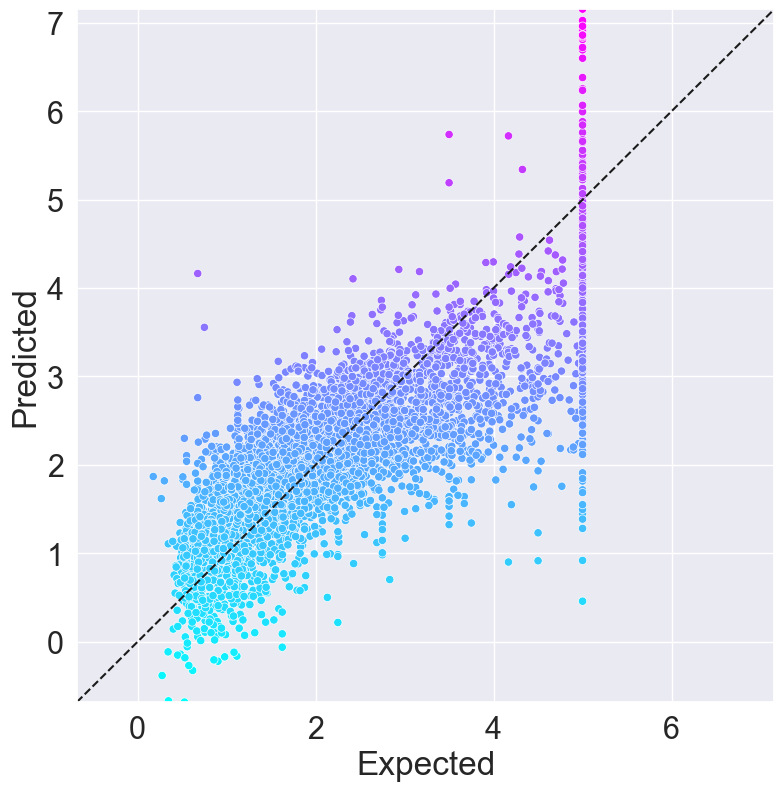

In [560]:
#Creating a DataFrame to compare the predicted and expected values from the linear regression model.
df = pd.DataFrame()

#Adding a new column to the DataFrame called 'Expected' which contains the expected values from the testing data.
df['Expected'] = pd.Series(expected)

#Adding a new column to the DataFrame called 'Predicted' which contains the predicted values from the linear regression model.
df['Predicted'] = pd.Series(predicted)

#Creating a scatter plot of the expected values against the predicted values.
figure = plt.figure(figsize=(9, 9))

#Creating a scatter plot of the expected values against the predicted values.
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

#Starting point for the axes is the minimum of the expected and predicted values, and the end point is the maximum of the expected and predicted values. 
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

#Setting the limits of the x-axis and y-axis to be the same.
axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')


### Section 9 - Regression Model Metrics

In [561]:
from sklearn import metrics

#Calculating the R-squared score for the linear regression model.
print('R-squared score:', metrics.r2_score(expected, predicted))

#Calculating the mean squared error for the linear regression model.
print('Mean squared error:', metrics.mean_squared_error(expected, predicted))

R-squared score: 0.6008983115964331
Mean squared error: 0.535014977444912


### Best Model

In [562]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

estimators = {
    'Linear Regression': LinearRegression,
    'Elastic Net': ElasticNet,
    'Lasso': Lasso,
    'Ridge': Ridge
}

for estimator_name, estimator_object in estimators.items():
    estimator_object = estimator_object()
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(
        estimator=estimator_object,
        X=california.data,
        y=california.target,
        cv=kfold,
        scoring='r2'
    )
    print(
        f'{estimator_name:>16}: '
        f'mean of r2 scores = {scores.mean():.3f}'
    )

Linear Regression: mean of r2 scores = 0.599
     Elastic Net: mean of r2 scores = 0.423
           Lasso: mean of r2 scores = 0.285
           Ridge: mean of r2 scores = 0.599


### Section 11 - Analysis of Data

As you can see, Linear Regression and Ridge have the same R^2 of 0.599 which outpoerforms the ither two.